In [6]:
import cv2

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
import os
images = os.listdir('images/')
images

['1.jfif',
 '1.jpg',
 '1.png',
 '2.jpg',
 '2.png',
 '3.jpg',
 'Dallas_Fort-Worth-International-Airport.jpg',
 'green.jpg',
 'L715mfusion-NG.jpg',
 'Olympic_2BPark.jpeg',
 'watertreatment_wv2_2013257_highres_crop.jpg']

In [9]:
#SCALE IMAGE

#scale_percent = 30 #ercent of original size
#width = int(img.shape[1] * scale_percent / 100)
#height = int(img.shape[0] * scale_percent / 100)
#dim = (width, height)
## resize image
#img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#img_hsv = cv2.resize(img_hsv, dim, interpolation = cv2.INTER_AREA)

# Visualizations

In [10]:
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#from matplotlib import colors

In [11]:
#r, g, b = cv2.split(img)
#fig = plt.figure()
#axis = fig.add_subplot(1, 1, 1, projection="3d")
#pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
#norm = colors.Normalize(vmin=-1.,vmax=1.)
#norm.autoscale(pixel_colors)
#pixel_colors = norm(pixel_colors).tolist()
#axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
#axis.set_xlabel("Red")
#axis.set_ylabel("Green")
#axis.set_zlabel("Blue")
#plt.show()

In [12]:
#h, s, v = cv2.split(img_hsv)
#fig = plt.figure()
#axis = fig.add_subplot(1, 1, 1, projection="3d")
#axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
#axis.set_xlabel("Hue")
#axis.set_ylabel("Saturation")
#axis.set_zlabel("Value")
#plt.show()

# Code

In [333]:
#  Color Intensities 

# Higher Light Values detect greenery with more accuracy but will include water and other noise, lower values will
# decrease noise but also decrease green accuracy
light_val = 10  #Between 0 and 20

# Higher Dark values will detect less surrounding land, but at the cost of patches in green area(Due to sunlight shadows mostly)
dark_val = 0    #Between 0 and 20

In [334]:
assert 0<=light_val<=20, "Light Val Out of Range"
assert 0<=dark_val<=20, "Dark Val Out of Range"


#green color range in form of (H, S, V)
start = (35+dark_val,35,35)
end = (90+light_val,255,255)

In [335]:
dark = np.full((10, 10, 3), start, dtype=np.uint8) / 255.0
light = np.full((10, 10, 3), end, dtype=np.uint8) / 255.0

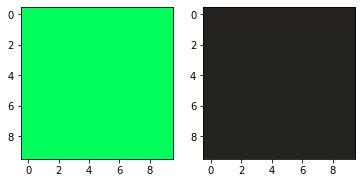

In [336]:
from matplotlib.colors import hsv_to_rgb
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(light))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dark))
plt.show()

In [346]:
#Function to cut out the color mask from the image

def mask_image(image):
    plt.imshow(image)
    mask = cv2.inRange(image, start, end)
    result = cv2.bitwise_and(image, image, mask=mask)
    return mask, result

In [347]:
#Function to display the mask output both in grayscale and rgb

def display_image(mask, result):    
    
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.show()

In [349]:
 index = 2   #Choose image
img_path = images[index]
img = cv2.imread(os.path.join('images/',img_path), cv2.COLOR_BGR2HSV)

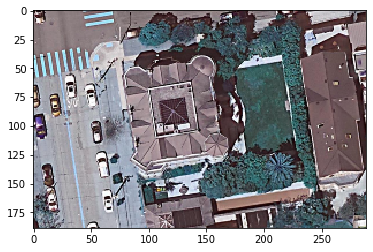

In [350]:
mask, result = mask_image(img)

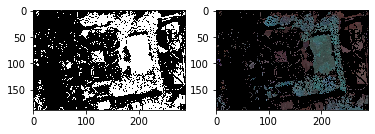

In [351]:
display_image(mask, result)

In [354]:
#SAVE OUTPUT TO DISK
from PIL import Image
output=np.concatenate((img, result))
im = Image.fromarray(output)
im.save("file.jpeg")

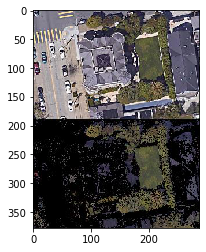

In [358]:
res = cv2.imread('file.jpeg')
plt.imshow(res)